In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

***Read in excel file***

In [3]:
df = pd.ExcelFile(r'../Data/raw_data/41467_2019_13483_MOESM4_ESM.xlsx')

***Read in sheets from excel file***

In [48]:
exp_data = df.parse('Expression Data', index_col='log-TPM')
metadata = df.parse('Metadata')

In [5]:
exp_data.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
log-TPM,,,,,,,,,,,,,,,,,,,,,
b0002,11.006653,11.130196,11.704951,11.888217,11.064810,10.779071,9.976401,10.291135,11.229767,11.214065,...,10.271327,10.276565,11.148538,11.170578,11.676604,11.726097,11.881529,11.923237,11.496410,11.552762
b0003,10.415654,10.523138,11.423835,11.803781,10.776984,10.597810,9.596833,10.191503,10.897938,10.861157,...,10.160291,10.116861,10.314322,10.392251,10.916426,10.909277,11.023924,11.038426,10.624301,10.764195
b0004,10.594871,10.725062,10.457270,10.779162,10.394971,10.113950,8.741617,9.082231,10.185151,10.164655,...,10.475069,10.434352,10.679541,10.723953,11.143310,11.112721,11.184795,11.241845,10.953206,11.001006
b0005,6.316102,6.258499,5.422129,5.336121,6.716069,6.410864,4.626949,4.756153,6.527653,6.136168,...,5.979079,5.705586,6.306120,6.291340,5.058537,4.835550,5.448097,5.757951,5.873964,5.808618
b0006,6.915771,6.897597,6.775645,6.782605,6.761813,6.816532,6.686767,6.860036,6.862147,6.817480,...,8.371287,8.322390,8.137515,8.071837,7.354131,7.365536,7.328101,7.314761,8.057750,8.105213


In [6]:
metadata.head()

,Sample ID,Study,Project ID,Condition ID,Replicate #,Strain Description,Strain,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),...,Culture Type,Growth Rate (1/hr),Evolved Sample,Isolate Type,Sequencing Machine,Additional Details,Biological Replicates,Alignment,DOI,GEO
0,control__wt_glc__1,Control,control,wt_glc,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,NaN,No,NaN,MiSeq,NaN,2,94.33,doi.org/10.1101/080929,GSE65643
1,control__wt_glc__2,Control,control,wt_glc,2,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,NaN,No,NaN,MiSeq,NaN,2,94.24,doi.org/10.1101/080929,GSE65643
2,fur__wt_dpd__1,Fur,fur,wt_dpd,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,0.000000,No,NaN,MiSeq,NaN,2,98.04,doi.org/10.1038/ncomms5910,GSE54900
3,fur__wt_dpd__2,Fur,fur,wt_dpd,2,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,0.000000,No,NaN,MiSeq,NaN,2,98.30,doi.org/10.1038/ncomms5910,GSE54900
4,fur__wt_fe__1,Fur,fur,wt_fe,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,1.060606,No,NaN,MiSeq,NaN,2,93.35,doi.org/10.1038/ncomms5910,GSE54900


***Remove all Sample IDs that contain no growth rate information***

In [49]:
metadata_clean = metadata.dropna(subset=['Growth Rate (1/hr)'])
metadata_clean = metadata_clean[metadata_clean['Growth Rate (1/hr)'] != 0]

In [8]:
#metadata_clean = metadata_clean[['Sample ID', 'Growth Rate (1/hr)']]

In [10]:
metadata_clean

,Sample ID,Study,Project ID,Condition ID,Replicate #,Strain Description,Strain,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),...,Culture Type,Growth Rate (1/hr),Evolved Sample,Isolate Type,Sequencing Machine,Additional Details,Biological Replicates,Alignment,DOI,GEO
4,fur__wt_fe__1,Fur,fur,wt_fe,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,1.060606,No,NaN,MiSeq,NaN,2,93.35,doi.org/10.1038/ncomms5910,GSE54900
5,fur__wt_fe__2,Fur,fur,wt_fe,2,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,1.060606,No,NaN,MiSeq,NaN,2,92.38,doi.org/10.1038/ncomms5910,GSE54900
8,fur__delfur_fe2__1,Fur,fur,delfur_fe2,1,Escherichia coli K-12 MG1655 del_fur,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,0.619469,No,NaN,MiSeq,NaN,2,92.80,doi.org/10.1038/ncomms5910,GSE54900
9,fur__delfur_fe2__2,Fur,fur,delfur_fe2,2,Escherichia coli K-12 MG1655 del_fur,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,0.619469,No,NaN,MiSeq,NaN,2,93.24,doi.org/10.1038/ncomms5910,GSE54900
55,omics__bw_ac__1,Omics,omics,bw_ac,1,Escherichia coli BW25113,BW25113,M9,acetate(3.5),NH4Cl(1),...,Batch,0.203000,No,NaN,MiSeq,NaN,2,97.80,doi.org/10.1038/ncomms13091,GSE59759
56,omics__bw_ac__2,Omics,omics,bw_ac,2,Escherichia coli BW25113,BW25113,M9,acetate(3.5),NH4Cl(1),...,Batch,0.203000,No,NaN,MiSeq,NaN,2,98.04,doi.org/10.1038/ncomms13091,GSE59759
57,omics__bw_fum__1,Omics,omics,bw_fum,1,Escherichia coli BW25113,BW25113,M9,fumarate(2.8),NH4Cl(1),...,Batch,0.309000,No,NaN,MiSeq,NaN,2,97.94,doi.org/10.1038/ncomms13091,GSE59759
58,omics__bw_fum__2,Omics,omics,bw_fum,2,Escherichia coli BW25113,BW25113,M9,fumarate(2.8),NH4Cl(1),...,Batch,0.309000,No,NaN,MiSeq,NaN,2,98.32,doi.org/10.1038/ncomms13091,GSE59759
59,omics__bw_glc__1,Omics,omics,bw_glc,1,Escherichia coli BW25113,BW25113,M9,glucose(5),NH4Cl(1),...,Batch,0.607500,No,NaN,MiSeq,NaN,2,97.62,doi.org/10.1038/ncomms13091,GSE59759
60,omics__bw_glc__2,Omics,omics,bw_glc,2,Escherichia coli BW25113,BW25113,M9,glucose(5),NH4Cl(1),...,Batch,0.607500,No,NaN,MiSeq,NaN,2,98.13,doi.org/10.1038/ncomms13091,GSE59759


***Determining distribution of different variables***

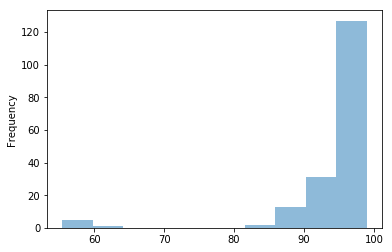

In [11]:
metadata_clean['Alignment'].plot.hist(alpha=0.5)

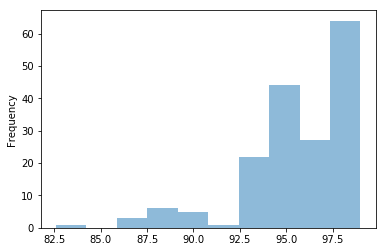

In [52]:
#Remove all Sample IDs where the alignment is less than 80%
metadata_clean = metadata_clean[metadata_clean['Alignment'] > 80]
metadata_clean['Alignment'].plot.hist(alpha=0.5)

In [13]:
metadata_clean

,Sample ID,Study,Project ID,Condition ID,Replicate #,Strain Description,Strain,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),...,Culture Type,Growth Rate (1/hr),Evolved Sample,Isolate Type,Sequencing Machine,Additional Details,Biological Replicates,Alignment,DOI,GEO
4,fur__wt_fe__1,Fur,fur,wt_fe,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,1.060606,No,NaN,MiSeq,NaN,2,93.35,doi.org/10.1038/ncomms5910,GSE54900
5,fur__wt_fe__2,Fur,fur,wt_fe,2,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,1.060606,No,NaN,MiSeq,NaN,2,92.38,doi.org/10.1038/ncomms5910,GSE54900
8,fur__delfur_fe2__1,Fur,fur,delfur_fe2,1,Escherichia coli K-12 MG1655 del_fur,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,0.619469,No,NaN,MiSeq,NaN,2,92.80,doi.org/10.1038/ncomms5910,GSE54900
9,fur__delfur_fe2__2,Fur,fur,delfur_fe2,2,Escherichia coli K-12 MG1655 del_fur,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,0.619469,No,NaN,MiSeq,NaN,2,93.24,doi.org/10.1038/ncomms5910,GSE54900
55,omics__bw_ac__1,Omics,omics,bw_ac,1,Escherichia coli BW25113,BW25113,M9,acetate(3.5),NH4Cl(1),...,Batch,0.203000,No,NaN,MiSeq,NaN,2,97.80,doi.org/10.1038/ncomms13091,GSE59759
56,omics__bw_ac__2,Omics,omics,bw_ac,2,Escherichia coli BW25113,BW25113,M9,acetate(3.5),NH4Cl(1),...,Batch,0.203000,No,NaN,MiSeq,NaN,2,98.04,doi.org/10.1038/ncomms13091,GSE59759
57,omics__bw_fum__1,Omics,omics,bw_fum,1,Escherichia coli BW25113,BW25113,M9,fumarate(2.8),NH4Cl(1),...,Batch,0.309000,No,NaN,MiSeq,NaN,2,97.94,doi.org/10.1038/ncomms13091,GSE59759
58,omics__bw_fum__2,Omics,omics,bw_fum,2,Escherichia coli BW25113,BW25113,M9,fumarate(2.8),NH4Cl(1),...,Batch,0.309000,No,NaN,MiSeq,NaN,2,98.32,doi.org/10.1038/ncomms13091,GSE59759
59,omics__bw_glc__1,Omics,omics,bw_glc,1,Escherichia coli BW25113,BW25113,M9,glucose(5),NH4Cl(1),...,Batch,0.607500,No,NaN,MiSeq,NaN,2,97.62,doi.org/10.1038/ncomms13091,GSE59759
60,omics__bw_glc__2,Omics,omics,bw_glc,2,Escherichia coli BW25113,BW25113,M9,glucose(5),NH4Cl(1),...,Batch,0.607500,No,NaN,MiSeq,NaN,2,98.13,doi.org/10.1038/ncomms13091,GSE59759


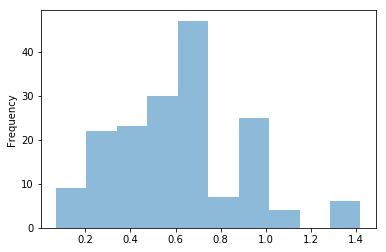

In [28]:
metadata_clean['Growth Rate (1/hr)'].plot.hist(alpha=0.5)

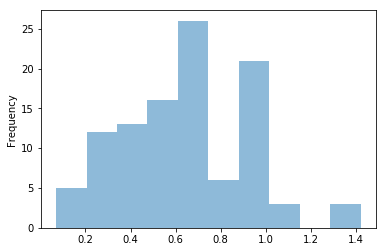

In [29]:
metadata_clean[metadata_clean['Replicate #'] == 1]['Growth Rate (1/hr)'].plot.hist(alpha=0.5)

In [15]:
#Count the number of strains to determine low counts
metadata_clean['Strain'].value_counts()

MG1655     151
BW25113     22
Name: Strain, dtype: int64

***Remove all columns (Sample IDs) in expression dataset if there was no growth rate information found***

In [16]:
exp_data.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
log-TPM,,,,,,,,,,,,,,,,,,,,,
b0002,11.006653,11.130196,11.704951,11.888217,11.064810,10.779071,9.976401,10.291135,11.229767,11.214065,...,10.271327,10.276565,11.148538,11.170578,11.676604,11.726097,11.881529,11.923237,11.496410,11.552762
b0003,10.415654,10.523138,11.423835,11.803781,10.776984,10.597810,9.596833,10.191503,10.897938,10.861157,...,10.160291,10.116861,10.314322,10.392251,10.916426,10.909277,11.023924,11.038426,10.624301,10.764195
b0004,10.594871,10.725062,10.457270,10.779162,10.394971,10.113950,8.741617,9.082231,10.185151,10.164655,...,10.475069,10.434352,10.679541,10.723953,11.143310,11.112721,11.184795,11.241845,10.953206,11.001006
b0005,6.316102,6.258499,5.422129,5.336121,6.716069,6.410864,4.626949,4.756153,6.527653,6.136168,...,5.979079,5.705586,6.306120,6.291340,5.058537,4.835550,5.448097,5.757951,5.873964,5.808618
b0006,6.915771,6.897597,6.775645,6.782605,6.761813,6.816532,6.686767,6.860036,6.862147,6.817480,...,8.371287,8.322390,8.137515,8.071837,7.354131,7.365536,7.328101,7.314761,8.057750,8.105213


In [17]:
# for col in exp_data.columns:
#     if col not in metadata_clean['Sample ID'].tolist():
#         exp_data[col] = np.nan

In [18]:
# exp_data_clean = exp_data.dropna(axis='columns')

In [60]:
exp_data_clean = exp_data[metadata_clean['Sample ID']]
assert list(metadata_clean['Sample ID']) == list(exp_data_clean.columns)

In [55]:
exp_data_clean.head()

,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_fe2__1,fur__delfur_fe2__2,omics__bw_ac__1,omics__bw_ac__2,omics__bw_fum__1,omics__bw_fum__2,omics__bw_glc__1,omics__bw_glc__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
log-TPM,,,,,,,,,,,,,,,,,,,,,
b0002,11.064810,10.779071,11.229767,11.214065,9.257348,9.182322,9.709213,9.672126,10.208587,10.218351,...,10.271327,10.276565,11.148538,11.170578,11.676604,11.726097,11.881529,11.923237,11.496410,11.552762
b0003,10.776984,10.597810,10.897938,10.861157,8.983408,8.943151,9.436004,9.394573,9.609637,9.677931,...,10.160291,10.116861,10.314322,10.392251,10.916426,10.909277,11.023924,11.038426,10.624301,10.764195
b0004,10.394971,10.113950,10.185151,10.164655,8.761690,8.779920,9.532673,9.534370,9.883558,9.870356,...,10.475069,10.434352,10.679541,10.723953,11.143310,11.112721,11.184795,11.241845,10.953206,11.001006
b0005,6.716069,6.410864,6.527653,6.136168,4.474204,4.720490,5.782102,5.326669,5.846675,5.972022,...,5.979079,5.705586,6.306120,6.291340,5.058537,4.835550,5.448097,5.757951,5.873964,5.808618
b0006,6.761813,6.816532,6.862147,6.817480,6.536457,6.439917,6.408731,6.276017,6.910200,6.843384,...,8.371287,8.322390,8.137515,8.071837,7.354131,7.365536,7.328101,7.314761,8.057750,8.105213


***Summary statistics of gene expression***

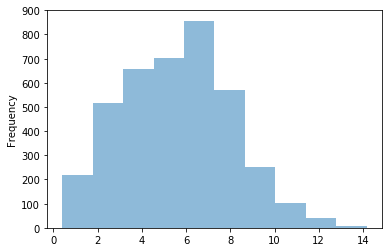

In [20]:
#Mean of expression data for each gene
exp_data_clean.mean(axis='columns').plot.hist(alpha=0.5)

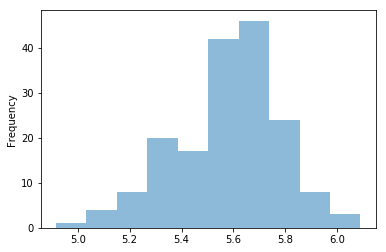

In [30]:
exp_data_clean.mean(axis='rows').plot.hist(alpha=0.5)

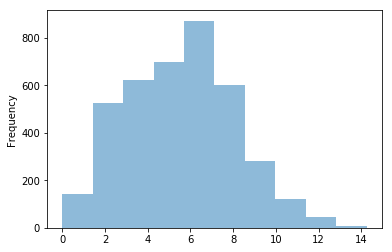

In [21]:
#Median of expression data for each gene
exp_data_clean.median(axis='columns').plot.hist(alpha=0.5)

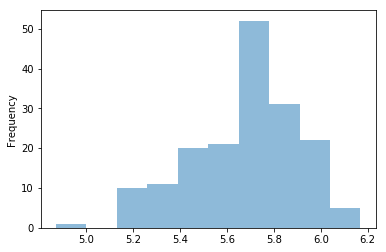

In [31]:
exp_data_clean.median(axis='rows').plot.hist(alpha=0.5)

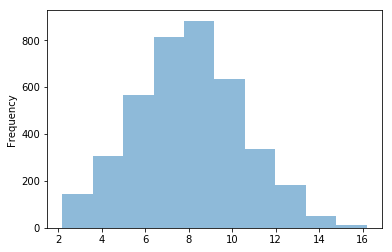

In [22]:
#Max of expression data for each gene
exp_data_clean.max(axis='columns').plot.hist(alpha=0.5)

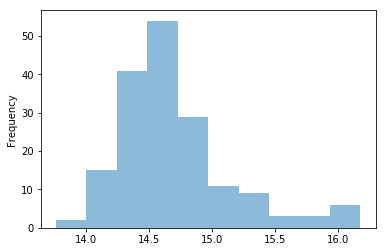

In [32]:
exp_data_clean.max(axis='rows').plot.hist(alpha=0.5)

***Variance***

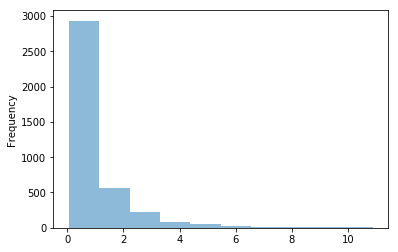

In [36]:
#Variance of expression data for each gene
exp_data_clean.var(axis='columns').plot.hist(alpha=0.5)

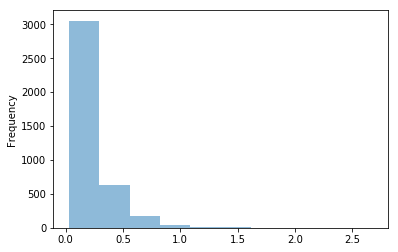

In [37]:
(exp_data_clean.std(axis='columns') / exp_data_clean.mean(axis='columns')).plot.hist(alpha=0.5)

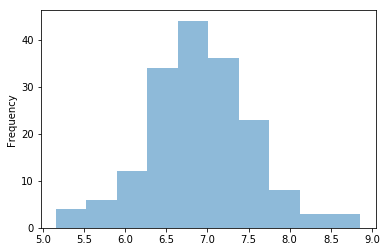

In [33]:
exp_data_clean.var(axis='rows').plot.hist(alpha=0.5)

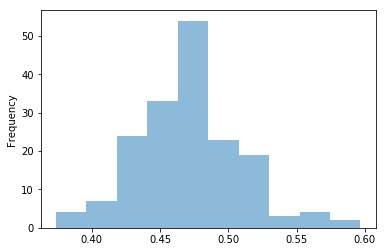

In [38]:
(exp_data_clean.std(axis='rows') / exp_data_clean.mean(axis='rows')).plot.hist(alpha=0.5)

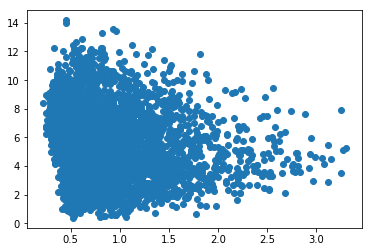

In [39]:
#Look at correlation between std and average gene expression
x_data = exp_data_clean.std(axis='columns')
y_data = exp_data_clean.mean(axis='columns')

fig, ax = plt.subplots()
ax.scatter(x_data, y_data)

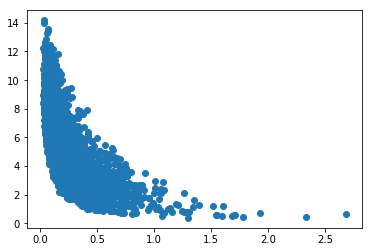

In [42]:
fig, ax = plt.subplots()
ax.scatter(x_data/y_data, y_data)

In [56]:
#Check if there are any NaN values for each gene
# for i in range(len(exp_data_clean)):
#     if exp_data_clean.isna().sum(axis='columns')[int('{}'.format(i))] > 0:
#         print(i)
        
exp_data_clean[exp_data_clean.isnull().sum(axis='columns') != 0]

,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_fe2__1,fur__delfur_fe2__2,omics__bw_ac__1,omics__bw_ac__2,omics__bw_fum__1,omics__bw_fum__2,omics__bw_glc__1,omics__bw_glc__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
log-TPM,,,,,,,,,,,,,,,,,,,,,


In [58]:
exp_data_clean.head()

,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_fe2__1,fur__delfur_fe2__2,omics__bw_ac__1,omics__bw_ac__2,omics__bw_fum__1,omics__bw_fum__2,omics__bw_glc__1,omics__bw_glc__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
log-TPM,,,,,,,,,,,,,,,,,,,,,
b0002,11.064810,10.779071,11.229767,11.214065,9.257348,9.182322,9.709213,9.672126,10.208587,10.218351,...,10.271327,10.276565,11.148538,11.170578,11.676604,11.726097,11.881529,11.923237,11.496410,11.552762
b0003,10.776984,10.597810,10.897938,10.861157,8.983408,8.943151,9.436004,9.394573,9.609637,9.677931,...,10.160291,10.116861,10.314322,10.392251,10.916426,10.909277,11.023924,11.038426,10.624301,10.764195
b0004,10.394971,10.113950,10.185151,10.164655,8.761690,8.779920,9.532673,9.534370,9.883558,9.870356,...,10.475069,10.434352,10.679541,10.723953,11.143310,11.112721,11.184795,11.241845,10.953206,11.001006
b0005,6.716069,6.410864,6.527653,6.136168,4.474204,4.720490,5.782102,5.326669,5.846675,5.972022,...,5.979079,5.705586,6.306120,6.291340,5.058537,4.835550,5.448097,5.757951,5.873964,5.808618
b0006,6.761813,6.816532,6.862147,6.817480,6.536457,6.439917,6.408731,6.276017,6.910200,6.843384,...,8.371287,8.322390,8.137515,8.071837,7.354131,7.365536,7.328101,7.314761,8.057750,8.105213


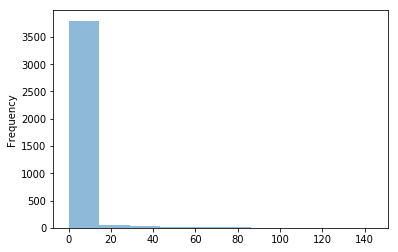

In [62]:
#Determine no expression for each gene per condition. Should we remove any?
exp_data_clean.isin([0]).sum(axis='columns').plot.hist(alpha=0.5)

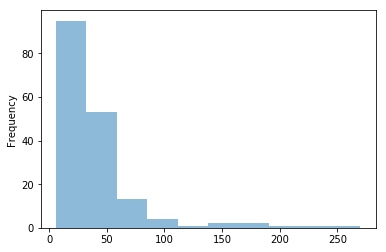

In [34]:
exp_data_clean.isin([0]).sum(axis='rows').plot.hist(alpha=0.5)

***Construct an all-to-all matrix to visualize correlations***

In [ ]:
#Check scatterplot of different conditions (highest and lowest) (walk before you can run)

In [64]:
#Spearman correlation of conditions
condition_corr = exp_data_clean.corr(method='spearman')
condition_corr.head()

,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_fe2__1,fur__delfur_fe2__2,omics__bw_ac__1,omics__bw_ac__2,omics__bw_fum__1,omics__bw_fum__2,omics__bw_glc__1,omics__bw_glc__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
fur__wt_fe__1,1.000000,0.996052,0.963706,0.963485,0.920567,0.919894,0.915651,0.913602,0.960286,0.961679,...,0.849489,0.850144,0.922285,0.930598,0.932191,0.938081,0.938491,0.941269,0.929753,0.922834
fur__wt_fe__2,0.996052,1.000000,0.962703,0.962414,0.922900,0.922577,0.918324,0.916052,0.960037,0.961047,...,0.846393,0.846562,0.919817,0.927784,0.927515,0.933182,0.933412,0.936131,0.928705,0.920489
fur__delfur_fe2__1,0.963706,0.962703,1.000000,0.996905,0.912404,0.912958,0.904385,0.902055,0.950829,0.951698,...,0.834489,0.833750,0.888814,0.901731,0.940483,0.943393,0.945141,0.946351,0.904708,0.903937
fur__delfur_fe2__2,0.963485,0.962414,0.996905,1.000000,0.911173,0.911780,0.902446,0.899954,0.950618,0.951611,...,0.831461,0.830588,0.885028,0.897943,0.937434,0.941021,0.943259,0.944290,0.901277,0.900799
omics__bw_ac__1,0.920567,0.922900,0.912404,0.911173,1.000000,0.995248,0.966034,0.964484,0.939546,0.940523,...,0.815925,0.815722,0.873928,0.878444,0.880243,0.885515,0.882385,0.883436,0.870208,0.864737


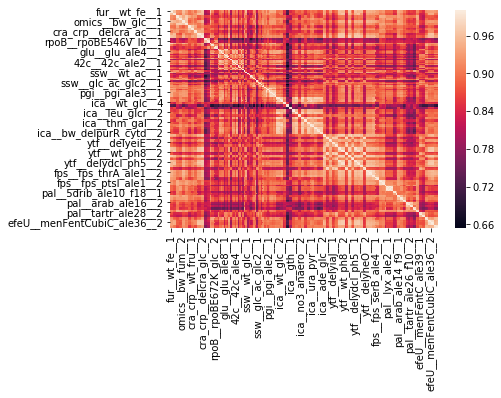

In [66]:
#Visualize conditions matrix
sns.heatmap(condition_corr)
plt.show()

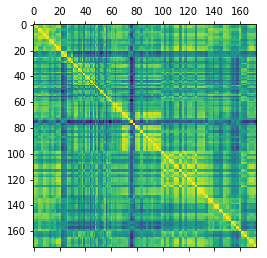

In [65]:
plt.matshow(condition_corr)

In [26]:
#Transpose expression data
exp_data_t = exp_data_clean.T
#Spearman correlation of genes
gene_corr = exp_data_t.corr(method='spearman')
gene_corr.head()

log-TPM,b0002,b0003,b0004,b0005,b0006,b0007,b0008,b0009,b0010,b0011,...,b4660_1,b4661,b4662,b4676,b4686,b4688,b4693,b4696_1,b4696_2,b4705
log-TPM,,,,,,,,,,,,,,,,,,,,,
b0002,1.000000,0.833219,0.792417,0.452448,0.328089,-0.274162,0.354155,-0.218883,-0.316809,-0.452935,...,0.054339,-0.280504,-0.079275,-0.190559,-0.349206,-0.325054,-0.169354,-0.266388,-0.398630,-0.372160
b0003,0.833219,1.000000,0.936773,0.631633,0.418504,-0.254969,0.363097,-0.234086,-0.232306,-0.404048,...,0.121378,-0.256556,-0.078908,-0.225927,-0.358028,-0.293774,-0.111783,-0.230079,-0.360714,-0.360932
b0004,0.792417,0.936773,1.000000,0.599018,0.470332,-0.273037,0.375596,-0.254340,-0.132237,-0.460987,...,0.213587,-0.262378,-0.186690,-0.325428,-0.417837,-0.307105,-0.158610,-0.238123,-0.365375,-0.406593
b0005,0.452448,0.631633,0.599018,1.000000,0.232865,-0.108515,0.211519,-0.041816,-0.014286,-0.183516,...,-0.073637,-0.255242,0.123314,0.077254,0.016256,0.091257,-0.273621,-0.367250,-0.295487,-0.001875
b0006,0.328089,0.418504,0.470332,0.232865,1.000000,-0.124340,0.409796,-0.276957,-0.103866,-0.245983,...,0.115190,-0.138900,-0.184315,-0.200579,-0.358639,-0.356473,-0.169123,-0.045418,-0.167158,-0.331368


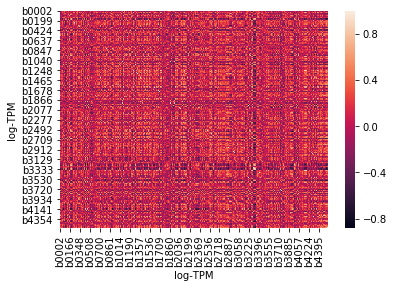

In [27]:
#Visualize genes matrix
sns.heatmap(gene_corr)
plt.show()